In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import os

from tqdm.notebook import tqdm

pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "half_filling"

os.makedirs(output_dir, exist_ok=True)

# Start with all defects on one side

$$\rho = \vert 0,1,...N/2 \rangle \langle 0, 1, ... N/2\vert$$

In [3]:
%%time

k = 10000
ne = 128
ls = numpy.arange(4,20,2)


single_filename = os.path.join(output_dir, "all_defects_left.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    for l in tqdm(ls):
        indices = list(range(l//2))
        probs = numpy.array([1.0], dtype=numpy.complex128)
        s = py_entropy.MultiDefectState([indices], probs, l, l//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        hilbert_space_sizes.append(D)
    pure_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_purities, ls=ls, Ds=hilbert_space_sizes)

CPU times: user 1.71 ms, sys: 276 µs, total: 1.99 ms
Wall time: 1.81 ms


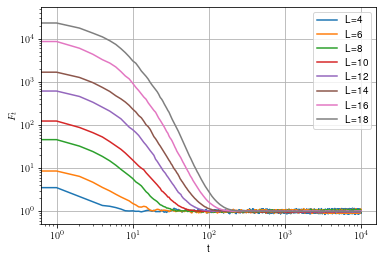

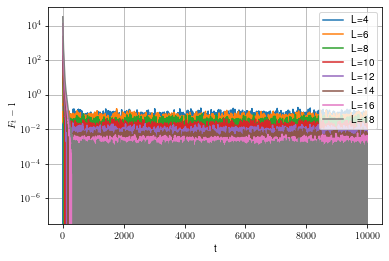

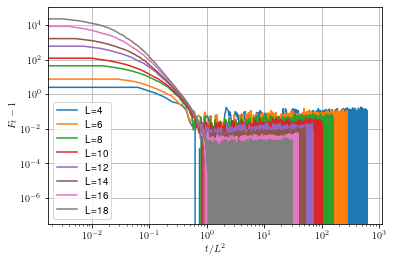

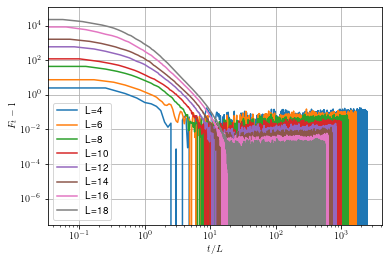

In [4]:
for l, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_purities):
    pyplot.plot(purity - 1, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator_diff.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator_diff_scaled.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator_diff_lscaled.pdf'))
pyplot.show()

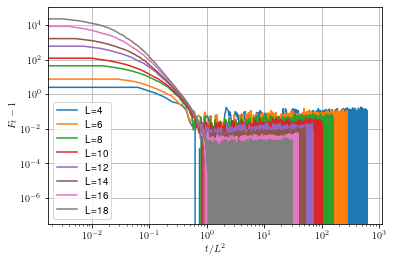

In [5]:
for l, purity in zip(ls, pure_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'purestate_estimator_diff_scaled.pdf'))
pyplot.show()

## Occupations

In [4]:
%%time

k = 1000
ne = 256
ls = numpy.arange(4,22,2)

single_filename = os.path.join(output_dir, "occupation_imbalance_lessT_moreL.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
    all_dens = [arr[f"dens_{l}"] for l in ls]
else:
    all_purities = []
    all_densities = []
    hilbert_space_sizes = []
    for l in tqdm(ls):
        indices = list(range(l//2))
        probs = numpy.array([1.0], dtype=numpy.complex128)
        s = py_entropy.MultiDefectState([indices], probs, l, num_experiments=ne)
        initial_purity = s.get_mean_purity()
        initial_density = s.get_density()
        
        purities, densities = s.apply_alternative_layers_and_save_mean_purity_and_density(k)
        
        D = len(s.get_enumerated_states())
        all_purities.append(numpy.concatenate([numpy.expand_dims(initial_purity, 0), purities]))
        all_densities.append(numpy.concatenate([numpy.expand_dims(initial_density, 0), densities]))
        
        hilbert_space_sizes.append(D)
    pure_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    kwargs = {}
    for l,dens in zip(ls,all_densities):
        kwargs[f"dens_{l}"] = dens
    numpy.savez(single_filename, data=pure_purities, ls=ls, Ds=hilbert_space_sizes, **kwargs)

  0%|          | 0/9 [00:00<?, ?it/s]

CPU times: user 6h 47min 3s, sys: 39.5 s, total: 6h 47min 43s
Wall time: 18min 47s


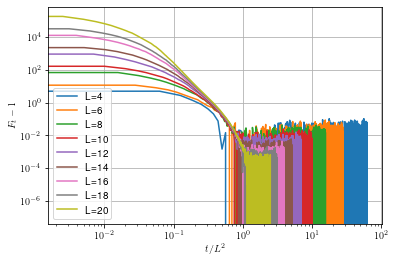

In [6]:
for l, purity in zip(ls, pure_purities):
    pyplot.plot(numpy.arange(len(purity)) / (l**2), (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.show()

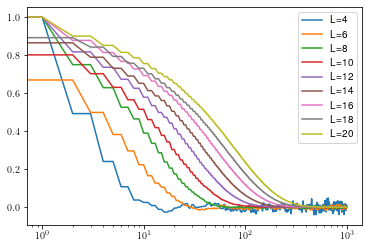

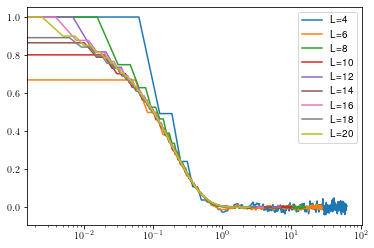

In [7]:
for l,dens in zip(ls,all_densities):
    pyplot.plot(dens[:,:l//2].mean(axis=-1) - dens[:,l//2:].mean(axis=-1), label=f"L={l}")
pyplot.xscale('log')
pyplot.legend()
pyplot.show()

for l,dens in zip(ls,all_densities):
    pyplot.plot(numpy.arange(len(purity))/l**2, dens[:,:l//2].mean(axis=-1) - dens[:,l//2:].mean(axis=-1), label=f"L={l}")
pyplot.xscale('log')
pyplot.legend()
pyplot.show()

# Defects intertwined

$$\rho = \vert 0, 2, .. N-1\rangle\langle 0, 2, ... N-1\vert$$

In [9]:
%%time

k = 10000
ne = 128
ls = numpy.arange(4,20,2)


single_filename = os.path.join(output_dir, "all_defects_intertwined.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_intertwined_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    for l in tqdm(ls):
        indices = list(range(0,l,2))
        probs = numpy.array([1.0], dtype=numpy.complex128)
        s = py_entropy.MultiDefectState([indices], probs, l, l//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        hilbert_space_sizes.append(D)
    pure_intertwined_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_intertwined_purities, ls=ls, Ds=hilbert_space_sizes)

CPU times: user 2.25 ms, sys: 179 µs, total: 2.43 ms
Wall time: 1.75 ms


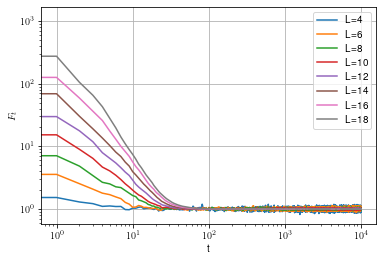

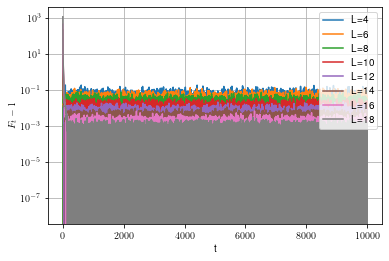

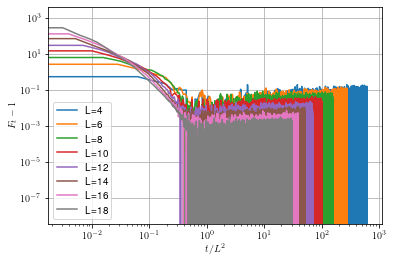

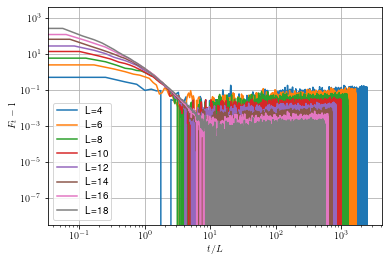

In [10]:
for l, purity in zip(ls, pure_intertwined_purities):
    pyplot.plot(purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'pure_intertwined_state_estimator.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_intertwined_purities):
    pyplot.plot(purity - 1, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.legend(loc='upper right')
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'pure_intertwined_state_estimator_diff.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_intertwined_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l**2), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'pure_intertwined_state_estimator_diff_scaled.pdf'))
pyplot.show()

for l, purity in zip(ls, pure_intertwined_purities):
    T = len(purity)
    pyplot.plot(numpy.arange(T) / (l), (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'pure_intertwined_state_estimator_diff_Lscaled.pdf'))
pyplot.show()

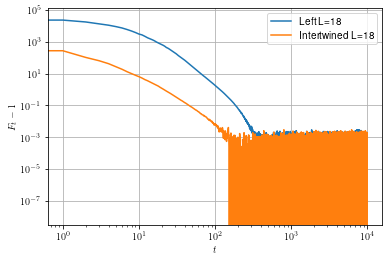

In [11]:
l, purity  = ls[-1], pure_purities[-1]
pyplot.plot(purity - 1, label=f"Left L={l}")
l, purity  = ls[-1], pure_intertwined_purities[-1]
pyplot.plot(purity - 1, label=f"Intertwined L={l}")
    
pyplot.xlabel('$t$')
pyplot.ylabel('$F_t - 1$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, 'pure_intertwined_comp.pdf'))
pyplot.show()

# Super

In [12]:
%%time

k = 10000
ne = 128
ls = numpy.arange(4,20,2)


single_filename = os.path.join(output_dir, "all_defects_intertwined_super.npz")

if os.path.exists(single_filename):
    arr = numpy.load(single_filename)
    ls = arr['ls']
    pure_intertwined_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
else:
    all_purities = []
    hilbert_space_sizes = []
    for l in tqdm(ls):
        indicesa = list(range(0,l,2))
        indicesb = list(range(0,l,2)) + 1
        probs = numpy.array([1.0], dtype=numpy.complex128)
        s = py_entropy.MultiDefectState([indices], probs, l, l//2, num_experiments=ne)
        purities = s.apply_alternative_layers_and_save_mean_purity(k)
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        hilbert_space_sizes.append(D)
    pure_intertwined_purities = numpy.array(all_purities)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    numpy.savez(single_filename, data=pure_intertwined_purities, ls=ls, Ds=hilbert_space_sizes)

  0%|          | 0/8 [00:00<?, ?it/s]

TypeError: can only concatenate list (not "int") to list